In [52]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [76]:
TICKER = 'SPY'
WINDOW = 20

In [81]:
df = yf.download(TICKER, 
                 start=pd.to_datetime(dt.date.today()) - pd.DateOffset(years=2) # start from 1 year prior
                )

/var/folders/7w/ql6tsk650l71gclng0jwl69c0000gn/T/ipykernel_94014/3197056690.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER,
[*********************100%***********************]  1 of 1 completed


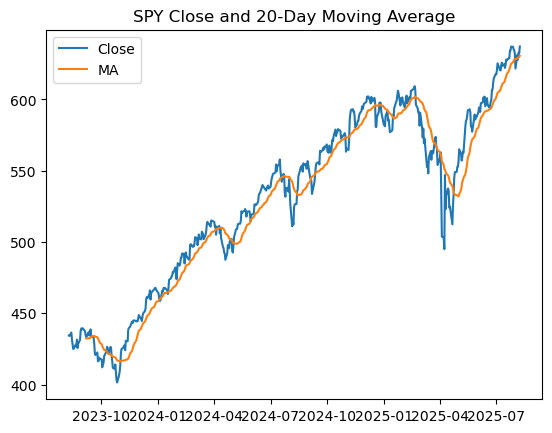

In [82]:
# moving average strategy
df['MA'] = df['Close'].rolling(window=WINDOW).mean() # average of the last 50 days

# Plot both lines separately since seaborn doesn't handle multiple y values well
plt.plot(df['Close'], label='Close')
plt.plot(df['MA'], label='MA')
plt.title(f'{TICKER} Close and {WINDOW}-Day Moving Average')
plt.legend()

plt.show()

In [98]:
df = df.dropna()
df.columns = df.columns.get_level_values(0) # removing multi-level columns

def add_ma_strategy(df):
  df['Strategy'] = np.where(df['Close'] > df['MA'], 1, -1)
  return df

df = add_ma_strategy(df)
df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) - 1 # how much times we would have increased our money if we invested in the asset
df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy'].shift()) - 1

df

Price,Close,High,Low,Open,Volume,MA,Strategy,asset_cumulative,strategy_cumulative
Date,,,,,,,,,
2023-09-07,433.316528,433.998362,431.270968,431.621621,70355400,432.349756,1,NaN,NaN
2023-09-08,433.969147,435.517920,433.004824,433.365226,61659700,432.330760,1,0.001506,0.001506
2023-09-11,436.823151,437.134831,434.894475,436.618574,60180100,432.467130,1,0.008093,0.008093
2023-09-12,434.426941,436.901095,433.842521,435.362073,67565400,432.363876,1,0.002563,0.002563
2023-09-13,434.933441,436.102311,433.540494,434.650952,60199300,432.540181,1,0.003731,0.003731
...,...,...,...,...,...,...,...,...,...
2025-08-04,631.169983,631.219971,625.580017,625.669983,73218000,628.781000,1,0.456603,0.103900
2025-08-05,627.969971,632.609985,627.039978,631.789978,68051400,629.162497,-1,0.449218,0.098304
2025-08-06,632.780029,633.440002,628.130005,629.049988,64357500,629.598499,1,0.460318,0.089891


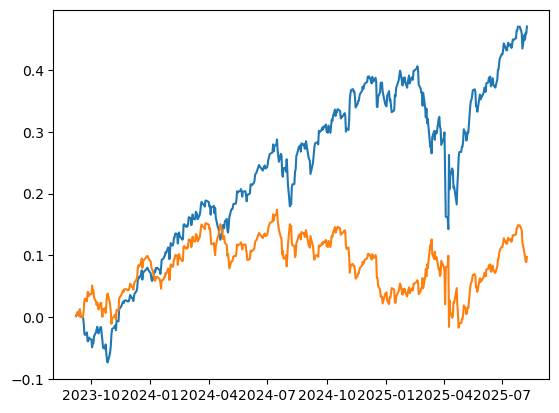

In [99]:
plt.plot(df['asset_cumulative'])
plt.plot(df['strategy_cumulative'])

In [ ]:
def get_data():
  df = yf.download(TICKER, 
                 start=pd.to_datetime(dt.date.today()) - pd.DateOffset(years=2) # start from 1 year prior
                 )
  df['MA'] = df['Close'].rolling(window=WINDOW).mean()

  df = df.dropna()
  df.columns = df.columns.get_level_values(0) # removing multi-level columns
  
  return df

def add_strategy(df):
  df['Strategy'] = np.where(df['Close'] > df['MA'], 1, -1)
  df['Strategy'] = df['Strategy'].shift(1)
  return df

def test_strategy(df):
  df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) - 1 # how much times we would have increased our money if we invested in the asset
  df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy'].shift()) - 1

  plt.plot(df['asset_cumulative'])
  plt.plot(df['strategy_cumulative'])
  plt.show()

  return df

def main():
  df = get_data()
  df = add_strategy(df)
  df = test_strategy(df)